In [31]:
import random
import pickle

import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


from extract_data import get_dataset

In [2]:
dataset = get_dataset()
x_data, y_data = dataset

/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
Either api or coformer not found. API= 1,2,4-thiadiazole derivative . Coformer= Vanillic acid
Either api or coformer not found. API= 4-cyanophenol . Coformer= 1,2-bis(4-dipyridyl)ethane
Either api or coformer not found. API= 4-cyanophenol . Coformer= trans-1,2-bis(4-dipyridyl)ethylene
Either api or coformer not found. API= bicalutamide . Coformer= trans-1,2-bis(4-dipyridyl)ethylene
Either api or coformer not found. API= Flurbiprofen . Coformer= 4,4'-ethylenebipyridine
Either api or coformer not found. API= Ibuprofen . Coformer= 4,4'-ethylenbipyridine
Either api or coformer not found. API= 3-cyanopyridin

In [3]:
n_components = 200
n_estimators = 600
max_depth = 4

In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_data.iloc[:,:-2])

pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

x_data_values = principal_components

y_data_values = y_data.iloc[:,:1]

random.seed(42)
shuffled_indices = random.sample(range(x_data_values.shape[0]),x_data_values.shape[0])
test_size = 0.2
train_cursor = int(np.floor((1-test_size)*(x_data_values.shape[0])))
train_indices = shuffled_indices[:train_cursor]
test_indices = shuffled_indices[train_cursor:]

x_train = pd.DataFrame(x_data_values[train_indices,:])
y_train = y_data_values.iloc[train_indices,:]

x_test = pd.DataFrame(x_data_values[test_indices,:])
y_test = y_data_values.iloc[test_indices,:]

In [26]:
gb_clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=0.1, max_depth=max_depth)

# gb_clf.fit(x_train, y_train) # To train the model
# with open('models/gb_model.pkl', 'wb') as f:
#     pickle.dump(gb_clf, f)

with open('models/gb_model.pkl', 'rb') as f:
    gb_clf = pickle.load(f)

y_pred = gb_clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.9818548387096774

In [27]:
accuracy_score(y_train, gb_clf.predict(x_train))

0.9878787878787879

In [28]:
r = 10

print("Accuracy:", round(accuracy_score(y_test, y_pred),r))
print("Precision:", round(precision_score(y_test, y_pred),r))
print("Recall:", round(recall_score(y_test, y_pred),r))
print("F1-Score:", round(f1_score(y_test, y_pred),r))
print(classification_report(y_test, y_pred))

Accuracy: 0.9818548387
Precision: 0.9869565217
Recall: 0.974248927
F1-Score: 0.9805615551
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       263
           1       0.99      0.97      0.98       233

    accuracy                           0.98       496
   macro avg       0.98      0.98      0.98       496
weighted avg       0.98      0.98      0.98       496



Confusion Matrix:
[[260   3]
 [  6 227]]


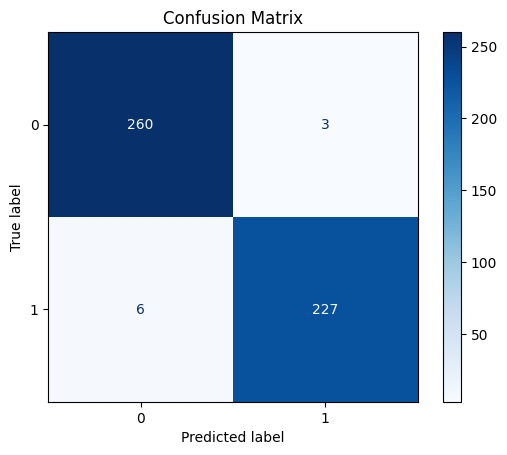

In [32]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()